# Forecasting Kualitas Udara Jakarta

Dataset yang digunakan adalah [Air Quality Index in Jakarta](https://www.kaggle.com/datasets/senadu34/air-quality-index-in-jakarta-2010-2021), dengan penjelasan setiap kolomnya sebagai berikut:


| **Nama Kolom** | **Deskripsi** |
|----------------|---------------|
| **tanggal** | Tanggal pencatatan data kualitas udara (format: `YYYY-MM-DD`). Contoh: `2010-01-01`. |
| **stasiun** | Nama/kode stasiun pemantauan kualitas udara. Misalnya: `DKI1 (Bunderan HI)` menandakan lokasi pemantauan berada di Bundaran HI, Jakarta. |
| **pm10** | Konsentrasi partikel udara berukuran ≤10 mikrometer (µg/m³). Partikel ini bisa masuk ke saluran pernapasan atas dan menyebabkan gangguan kesehatan. |
| **pm25** | Konsentrasi partikel udara berukuran ≤2.5 mikrometer (µg/m³). Lebih kecil dari PM10, partikel ini bisa masuk lebih dalam ke paru-paru. |
| **so2** | Konsentrasi gas **Sulfur Dioksida (SO₂)** dalam udara (µg/m³). Berasal dari pembakaran bahan bakar fosil, bisa menyebabkan iritasi saluran napas. |
| **co** | Konsentrasi **Karbon Monoksida (CO)** dalam udara (µg/m³). Gas beracun hasil pembakaran tidak sempurna bahan bakar. |
| **o3** | Konsentrasi **Ozon (O₃)** permukaan dalam udara (µg/m³). Meskipun ozon di atmosfer atas melindungi bumi, ozon di permukaan bisa berbahaya bagi kesehatan. |
| **no2** | Konsentrasi **Nitrogen Dioksida (NO₂)** dalam udara (µg/m³). Umumnya berasal dari emisi kendaraan dan industri. |
| **max** | Nilai tertinggi dari semua parameter pencemar udara pada hari tersebut. Contoh: `73.0` (nilai tertinggi dari parameter CO). |
| **critical** | Parameter polutan yang paling dominan pada hari tersebut, yaitu yang memiliki nilai **max**. Misal: `CO`. |
| **categori** | Kategori kualitas udara berdasarkan parameter **max**. Contoh: `SEDANG` berarti kualitas udara cukup baik tetapi dapat berdampak bagi kelompok sensitif. |

## Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import urllib
import missingno as msno
import seaborn as sns
from scipy import stats
from astropy.coordinates import SkyCoord
from astropy import units as u
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import joblib

## Data Gathering

In [ ]:
df = pd.read_csv('ispu_dki_all.csv')

## Exploratory Data Analysis (EDA)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4626 entries, 0 to 4625
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   4626 non-null   object 
 1   stasiun   4626 non-null   object 
 2   pm10      4466 non-null   float64
 3   pm25      723 non-null    float64
 4   so2       4607 non-null   float64
 5   co        4618 non-null   float64
 6   o3        4621 non-null   float64
 7   no2       4618 non-null   float64
 8   max       4626 non-null   float64
 9   critical  4625 non-null   object 
 10  categori  4626 non-null   object 
dtypes: float64(7), object(4)
memory usage: 397.7+ KB


In [ ]:
df.shape

(4626, 11)

In [ ]:
df.head()

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,2010-01-01,DKI1 (Bunderan HI),60.0,NaN,4.0,73.0,27.0,14.0,73.0,CO,SEDANG
1,2010-01-02,DKI1 (Bunderan HI),32.0,NaN,2.0,16.0,33.0,9.0,33.0,O3,BAIK
2,2010-01-03,DKI1 (Bunderan HI),27.0,NaN,2.0,19.0,20.0,9.0,27.0,PM10,BAIK
3,2010-01-04,DKI1 (Bunderan HI),22.0,NaN,2.0,16.0,15.0,6.0,22.0,PM10,BAIK
4,2010-01-05,DKI1 (Bunderan HI),25.0,NaN,2.0,17.0,15.0,8.0,25.0,PM10,BAIK


In [ ]:
df.describe()

,pm10,pm25,so2,co,o3,no2,max
count,4466.000000,723.000000,4607.000000,4618.000000,4621.000000,4618.000000,4626.000000
mean,65.086879,94.374827,28.183851,30.263534,86.586670,18.120832,99.432123
std,19.243150,27.427553,13.822107,13.640344,50.295879,8.451605,43.284775
min,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.000000,76.000000,18.000000,21.000000,51.000000,13.000000,70.000000
50%,64.000000,94.000000,27.000000,29.000000,78.000000,17.000000,91.000000
75%,75.000000,111.000000,34.000000,37.000000,110.000000,21.000000,118.000000
max,179.000000,287.000000,126.000000,134.000000,314.000000,134.000000,314.000000


In [ ]:
df.isna().sum()

,0
tanggal,0
stasiun,0
pm10,160
pm25,3903
so2,19
co,8
o3,5
no2,8
max,0
critical,1


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.nunique()

,0
tanggal,4626
stasiun,5
pm10,131
pm25,123
so2,87
co,94
o3,264
no2,75
max,244
critical,6


In [ ]:
numerical_cols = ['pm10', 'pm25', 'so2', 'co', 'o3', 'no2', 'max']

In [ ]:
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = ((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound)).sum()
outliers_iqr

,0
pm10,166
pm25,7
so2,77
co,129
o3,203
no2,190
max,246


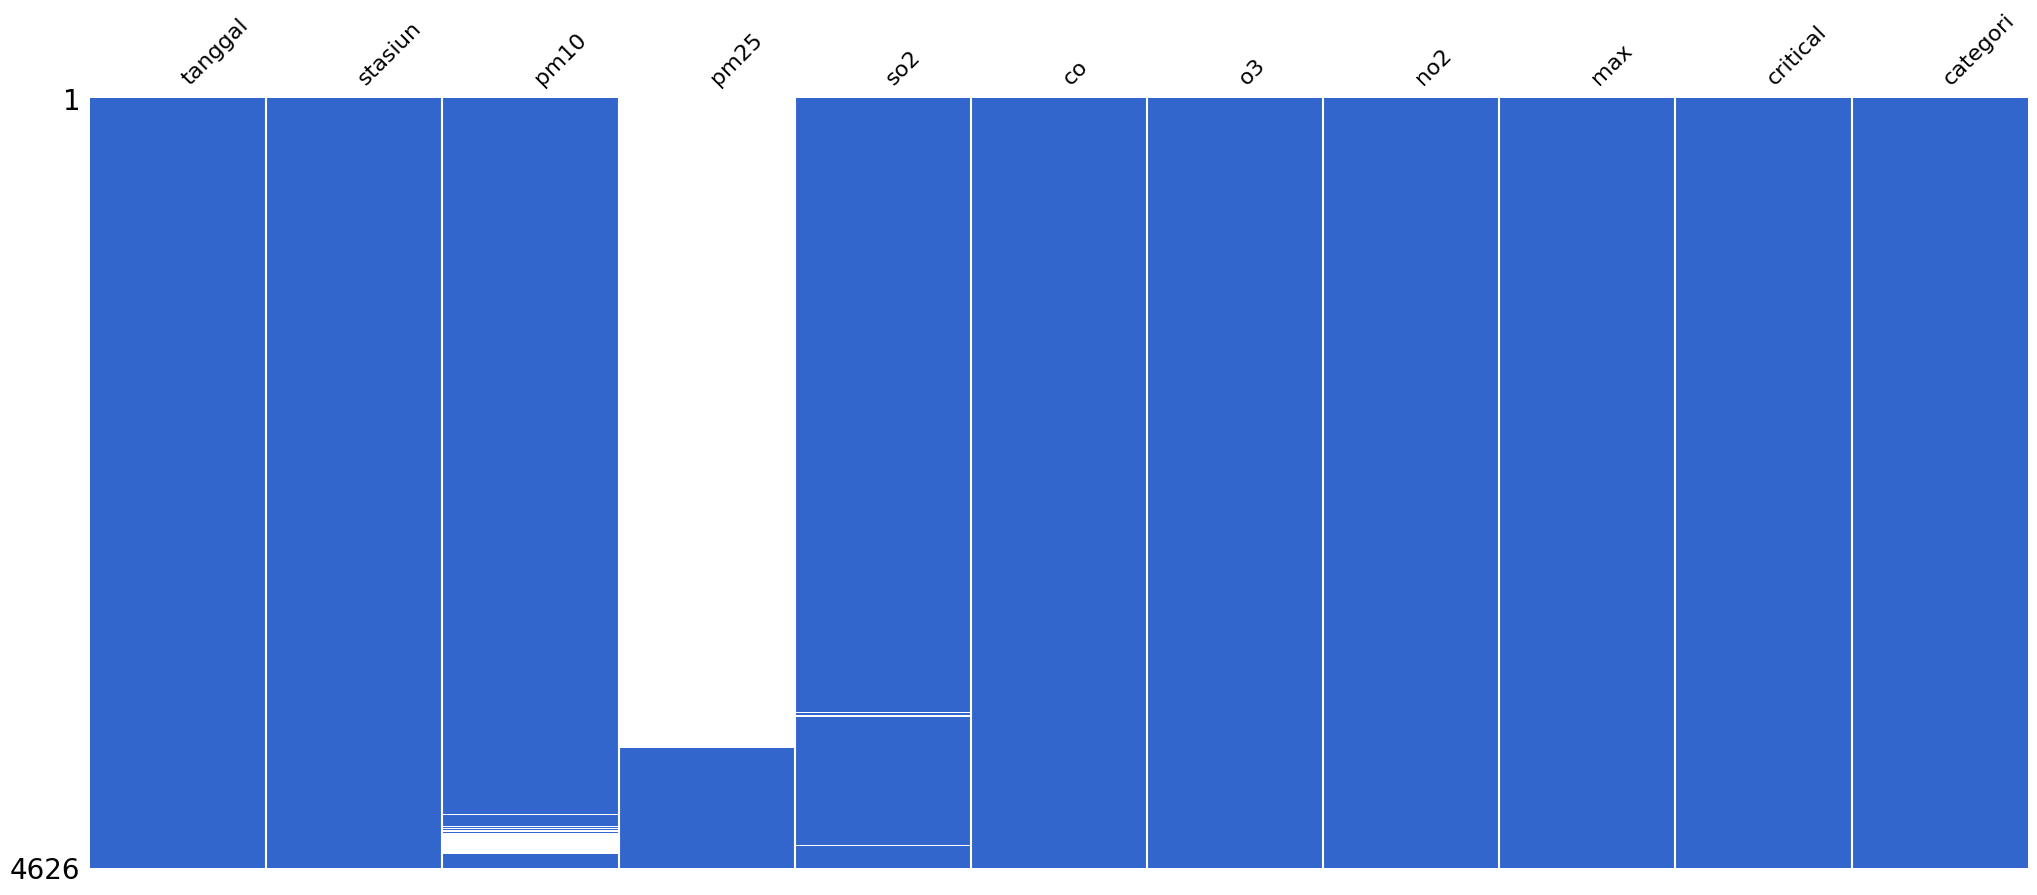

In [ ]:
# Atur palet warna seaborn
sns.set_palette("coolwarm")

# Visualisasi matriks missing values dengan warna
msno.matrix(df, sparkline=False, color=(0.2, 0.4, 0.8))  # Warna biru
plt.show()

<ipython-input-13-cd3444aa3278>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dupe_counts.index, y=dupe_counts.values, palette=["skyblue", "salmon"])


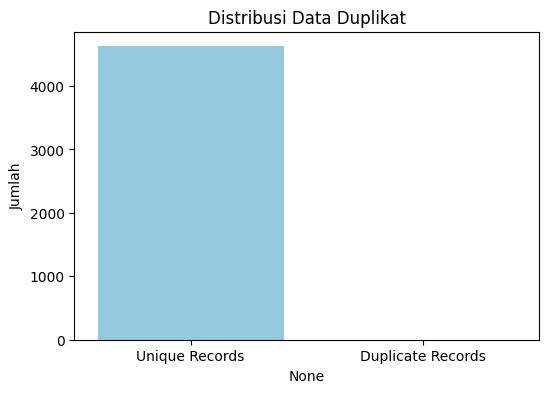

In [ ]:
duplicates = df.duplicated(keep=False)
df_dupes = df[duplicates]

# Hitung jumlah data asli dan duplikat
dupe_counts = pd.Series({
    "Unique Records": len(df) - df_dupes.shape[0],
    "Duplicate Records": df_dupes.shape[0]
})

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=dupe_counts.index, y=dupe_counts.values, palette=["skyblue", "salmon"])
plt.ylabel("Jumlah")
plt.title("Distribusi Data Duplikat")
plt.show()

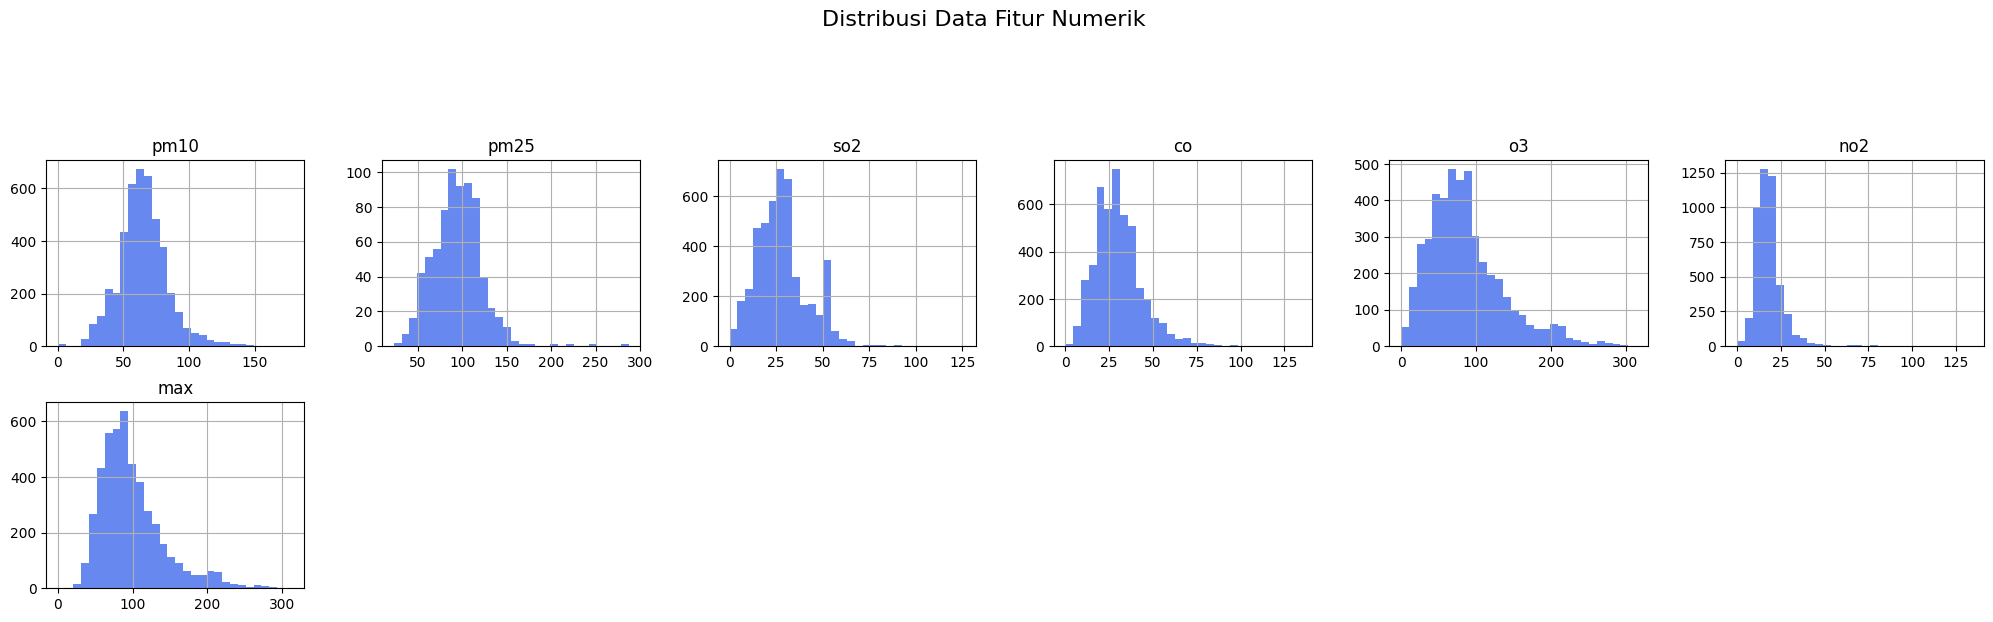

In [ ]:
df[numerical_cols].hist(figsize=(25, 15), bins=30, layout=(5, 6))
plt.suptitle("Distribusi Data Fitur Numerik", fontsize=16)
plt.show()

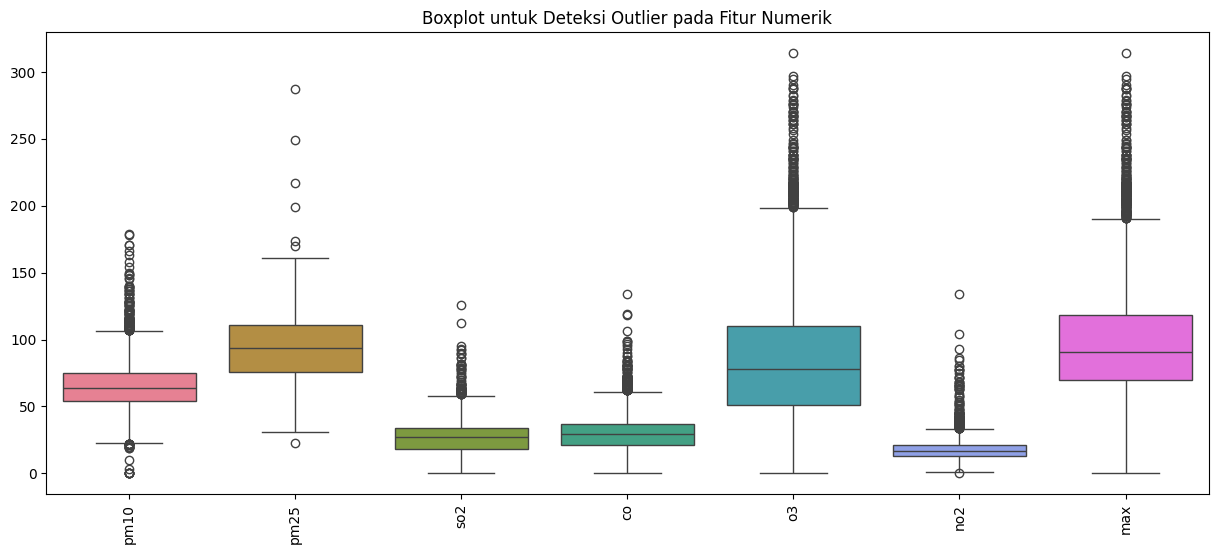

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df[numerical_cols])
plt.xticks(rotation=90)
plt.title("Boxplot untuk Deteksi Outlier pada Fitur Numerik")
plt.show()

<Axes: >

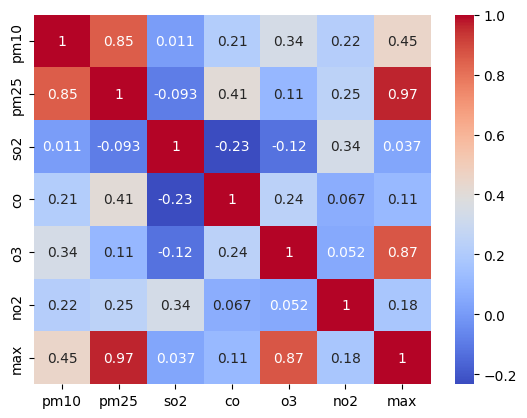

In [ ]:
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')

In [ ]:
df['tanggal'] = pd.to_datetime(df['tanggal'])

Text(0.5, 1.0, 'Tren Harian PM10, PM2.5, dan CO')

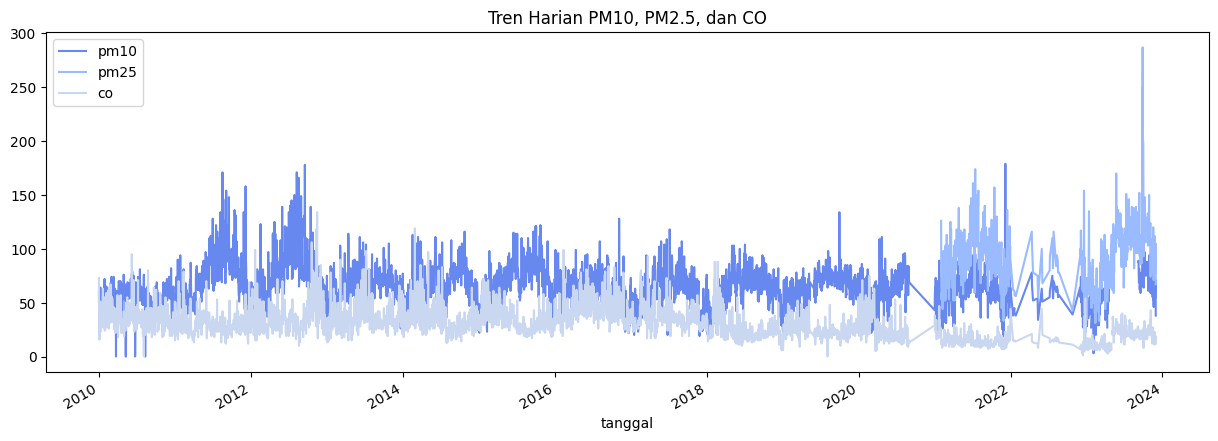

In [ ]:
df.set_index('tanggal')[['pm10', 'pm25', 'co']].plot(figsize=(15, 5))
plt.title('Tren Harian PM10, PM2.5, dan CO')

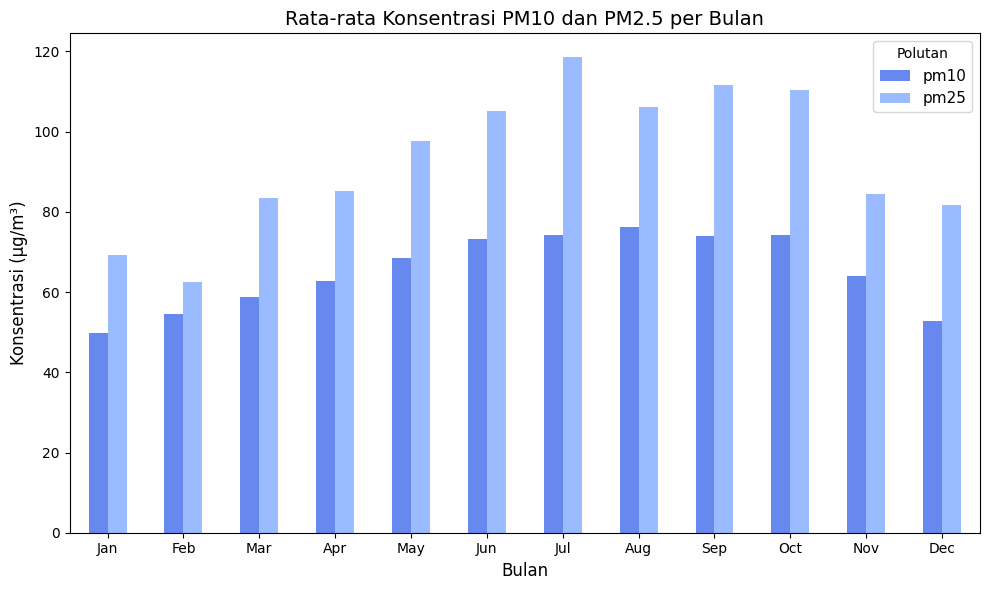

In [ ]:
import calendar

# Tambahkan kolom nama bulan (jika belum)
df['bulan'] = df['tanggal'].dt.month
df['nama_bulan'] = df['tanggal'].dt.strftime('%b')  # 'Jan', 'Feb', dst.

# Hitung rata-rata per nama bulan
bulan_order = list(calendar.month_abbr)[1:]  # ['Jan', 'Feb', ..., 'Dec']

df.groupby('nama_bulan')[['pm10', 'pm25']].mean().reindex(bulan_order).plot(kind='bar', figsize=(10, 6))

# Plotting
plt.title('Rata-rata Konsentrasi PM10 dan PM2.5 per Bulan', fontsize=14)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Konsentrasi (µg/m³)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Polutan', fontsize=11)
plt.tight_layout()
plt.show()

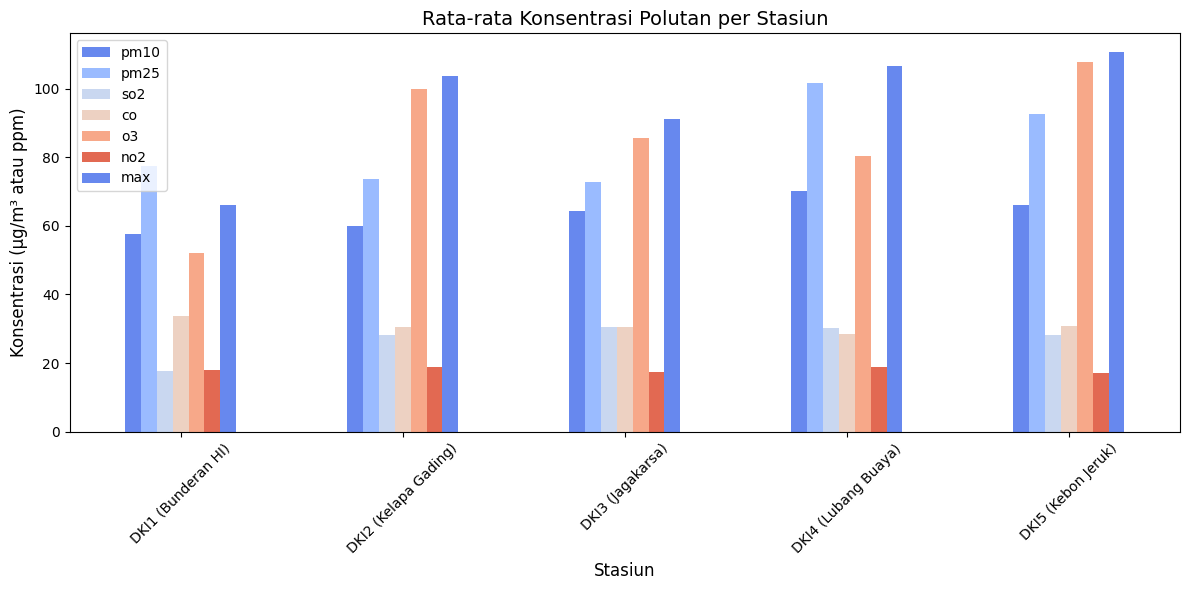

In [ ]:
df.groupby('stasiun')[numerical_cols].mean().plot(kind='bar', figsize=(12, 6))
plt.title('Rata-rata Konsentrasi Polutan per Stasiun', fontsize=14)
plt.xlabel('Stasiun', fontsize=12)
plt.ylabel('Konsentrasi (µg/m³ atau ppm)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

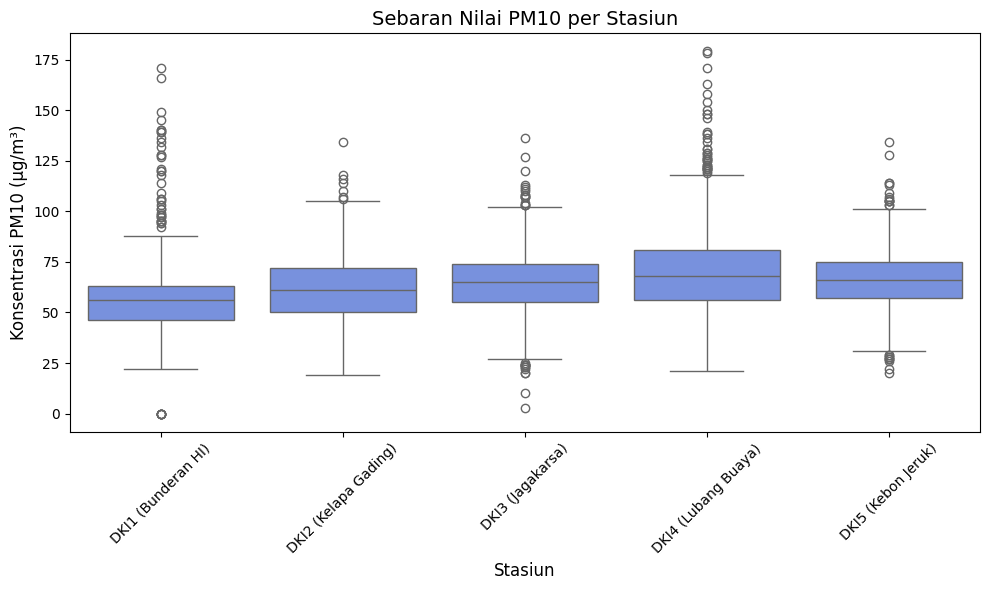

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='stasiun', y='pm10', data=df)
plt.title('Sebaran Nilai PM10 per Stasiun', fontsize=14)
plt.xlabel('Stasiun', fontsize=12)
plt.ylabel('Konsentrasi PM10 (µg/m³)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

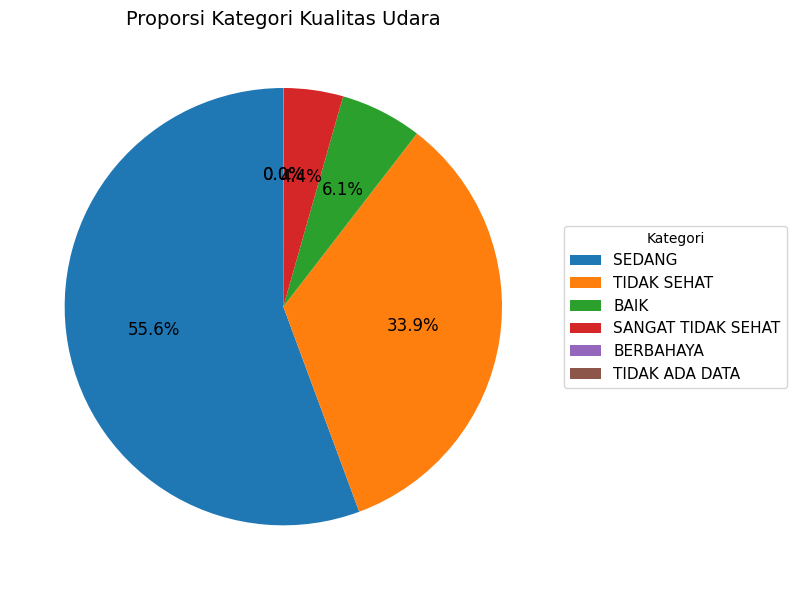

In [ ]:
kategori_counts = df['categori'].value_counts()
labels = kategori_counts.index
sizes = kategori_counts.values

# Warna konsisten dari colormap (misal: viridis atau tab10)
colors = plt.cm.tab10(range(len(sizes)))

# Plot pie chart
fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=None,  # label tidak langsung ditampilkan di pie
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 12}
)

# Tambahkan legend dengan warna yang konsisten
ax.legend(
    wedges,
    labels,
    title="Kategori",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=11
)

# Judul
plt.title('Proporsi Kategori Kualitas Udara', fontsize=14)
plt.tight_layout()
plt.show()

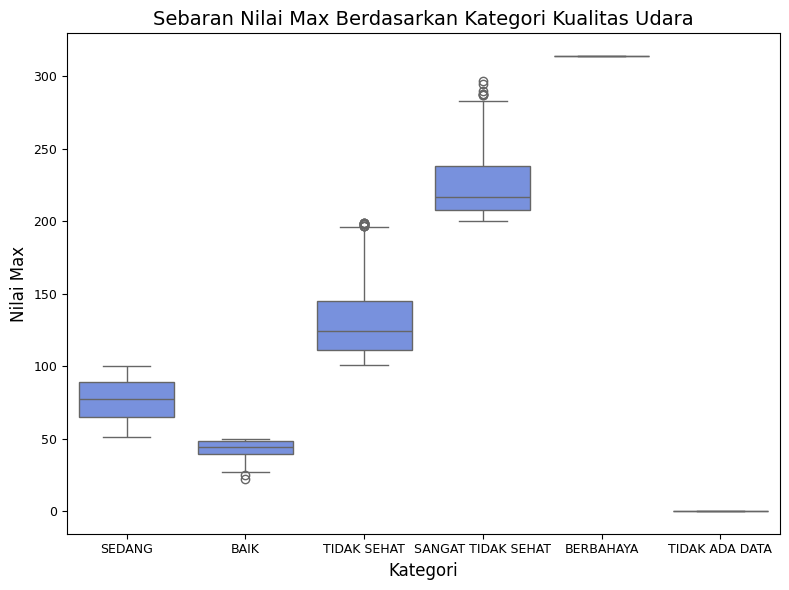

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='categori', y='max', data=df)
plt.title('Sebaran Nilai Max Berdasarkan Kategori Kualitas Udara', fontsize=14)
plt.xlabel('Kategori', fontsize=12)
plt.ylabel('Nilai Max', fontsize=12)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.show()

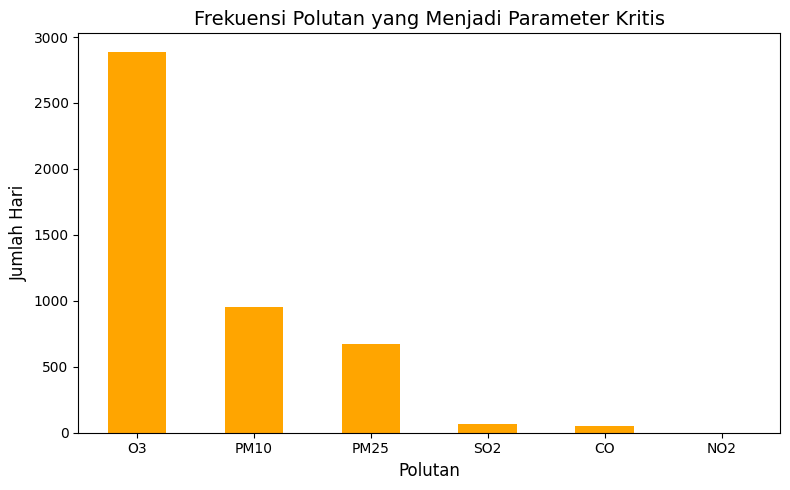

In [ ]:
df['critical'].value_counts().plot(kind='bar', color='orange', figsize=(8, 5))
plt.title('Frekuensi Polutan yang Menjadi Parameter Kritis', fontsize=14)
plt.xlabel('Polutan', fontsize=12)
plt.ylabel('Jumlah Hari', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

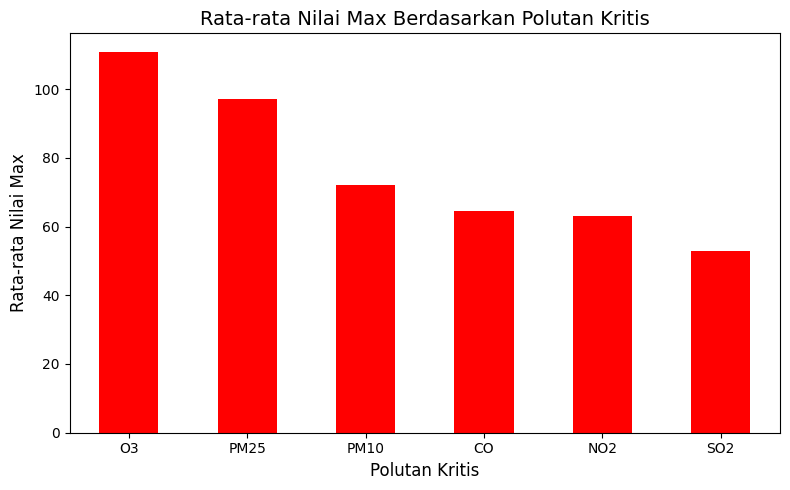

In [ ]:
df.groupby('critical')['max'].mean().sort_values(ascending=False).plot(kind='bar', color='red', figsize=(8, 5))
plt.title('Rata-rata Nilai Max Berdasarkan Polutan Kritis', fontsize=14)
plt.xlabel('Polutan Kritis', fontsize=12)
plt.ylabel('Rata-rata Nilai Max', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Insight dari Exploratory Data Analysis (EDA)

Berdasarkan hasil EDA terhadap dataset kualitas udara di **Jakarta**, diperoleh beberapa temuan penting sebagai berikut:

---

#### 🔹 1. Data Missing dan Duplikat
- Ditemukan beberapa **missing values**, terutama pada kolom polutan.
- Visualisasi **missing value matrix** membantu mengidentifikasi pola hilangnya data.
- Ditemukan juga data **duplikat** yang perlu ditangani sebelum pemodelan.

---

#### 🔹 2. Distribusi Data Numerik
- **Histogram** menunjukkan sebagian besar data numerik (`pm10`, `pm25`, `so2`, `co`, `o3`, `no2`, `max`) tidak berdistribusi normal.
- Beberapa fitur menunjukkan adanya **outlier signifikan**, yang dikonfirmasi melalui **boxplot**.

---

#### 🔹 3. Korelasi Antar Fitur
- **Heatmap korelasi** menunjukkan adanya hubungan yang kuat antar beberapa polutan.
- Hal ini mengindikasikan potensi **multikolinearitas**, yang perlu diperhatikan saat membuat model prediksi.

---

#### 🔹 4. Tren Kualitas Udara
- **Tren harian** untuk `pm10`, `pm25`, dan `co` memperlihatkan fluktuasi konsentrasi polutan.
- **Rata-rata bulanan** memperlihatkan pola musiman, dengan peningkatan konsentrasi pada bulan-bulan tertentu.

---

#### 🔹 5. Perbedaan Antar Stasiun
- Kualitas udara **bervariasi antar stasiun pemantauan**.
- Visualisasi **rata-rata polutan per stasiun** serta **sebaran PM10** menunjukkan adanya perbedaan yang signifikan.

---

#### 🔹 6. Kategori Kualitas Udara
- Sebagian besar hari masuk dalam kategori tertentu berdasarkan indeks kualitas udara.
- **Boxplot per kategori** menunjukkan sebaran nilai `max`, yang menggambarkan konsentrasi polutan maksimum setiap harinya.

---

#### 🔹 7. Polutan Kritis
- Polutan **CO** sering muncul sebagai **polutan kritis**, diikuti oleh polutan lainnya.
- Nilai rata-rata `max` bervariasi tergantung pada jenis polutan kritis yang muncul.

---

### ✅ Kesimpulan Awal

Dataset kualitas udara ini **layak digunakan untuk pemodelan prediktif**, namun perlu dilakukan beberapa tahapan pembersihan dan transformasi data:

- Penanganan **missing values**, **duplikat**, dan **outlier**
- Transformasi untuk **menormalkan distribusi data**
- Memperhatikan **tren musiman** dan **perbedaan antar stasiun**

Analisis ini menjadi dasar penting dalam pengembangan model prediksi kualitas udara yang lebih akurat dan andal.

## Data Pre-Processing

In [ ]:
df['tanggal'] = pd.to_datetime(df['tanggal'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4626 entries, 0 to 4625
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   tanggal     4626 non-null   datetime64[ns]
 1   stasiun     4626 non-null   object        
 2   pm10        4466 non-null   float64       
 3   pm25        723 non-null    float64       
 4   so2         4607 non-null   float64       
 5   co          4618 non-null   float64       
 6   o3          4621 non-null   float64       
 7   no2         4618 non-null   float64       
 8   max         4626 non-null   float64       
 9   critical    4625 non-null   object        
 10  categori    4626 non-null   object        
 11  bulan       4626 non-null   int32         
 12  nama_bulan  4626 non-null   object        
dtypes: datetime64[ns](1), float64(7), int32(1), object(4)
memory usage: 451.9+ KB


In [ ]:
df.drop(columns=['bulan', 'nama_bulan'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4626 entries, 0 to 4625
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   tanggal   4626 non-null   datetime64[ns]
 1   stasiun   4626 non-null   object        
 2   pm10      4466 non-null   float64       
 3   pm25      723 non-null    float64       
 4   so2       4607 non-null   float64       
 5   co        4618 non-null   float64       
 6   o3        4621 non-null   float64       
 7   no2       4618 non-null   float64       
 8   max       4626 non-null   float64       
 9   critical  4625 non-null   object        
 10  categori  4626 non-null   object        
dtypes: datetime64[ns](1), float64(7), object(3)
memory usage: 397.7+ KB


In [ ]:
df[numerical_cols] = df[numerical_cols].interpolate(method='linear')

In [ ]:
df['critical'].fillna(df['critical'].mode()[0], inplace=True)

<ipython-input-31-4a65486eee21>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['critical'].fillna(df['critical'].mode()[0], inplace=True)


In [ ]:
df.isna().sum()

,0
tanggal,0
stasiun,0
pm10,0
pm25,3666
so2,0
co,0
o3,0
no2,0
max,0
critical,0


In [ ]:
df.drop(columns=['pm25'], inplace=True)

In [ ]:
df.columns

Index(['tanggal', 'stasiun', 'pm10', 'so2', 'co', 'o3', 'no2', 'max',
       'critical', 'categori'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4626 entries, 0 to 4625
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   tanggal   4626 non-null   datetime64[ns]
 1   stasiun   4626 non-null   object        
 2   pm10      4626 non-null   float64       
 3   so2       4626 non-null   float64       
 4   co        4626 non-null   float64       
 5   o3        4626 non-null   float64       
 6   no2       4626 non-null   float64       
 7   max       4626 non-null   float64       
 8   critical  4626 non-null   object        
 9   categori  4626 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 361.5+ KB


In [ ]:
new_numerical_cols = ['pm10','so2', 'co', 'o3', 'no2', 'max']

In [ ]:
Q1 = df[new_numerical_cols].quantile(0.25)
Q3 = df[new_numerical_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = df[~((df[new_numerical_cols] < lower_bound) | (df[new_numerical_cols] > upper_bound)).any(axis=1)].copy()

In [ ]:
Q1 = df_cleaned[new_numerical_cols].quantile(0.25)
Q3 = df_cleaned[new_numerical_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = ((df_cleaned[new_numerical_cols] < lower_bound) | (df_cleaned[new_numerical_cols] > upper_bound)).sum()
outliers_iqr

,0
pm10,18
so2,17
co,0
o3,34
no2,53
max,63


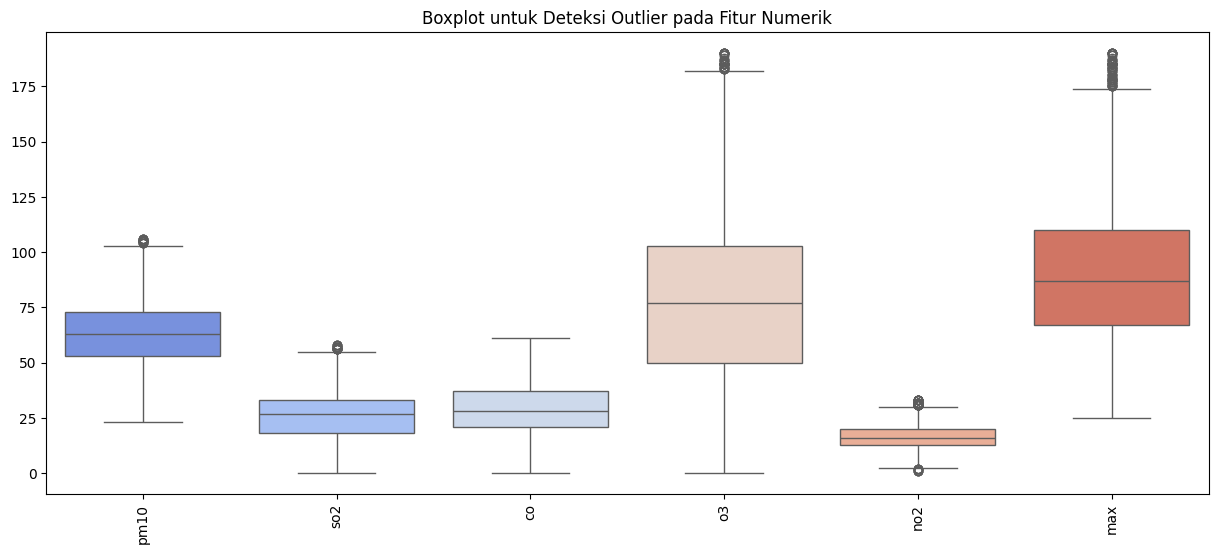

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_cleaned[new_numerical_cols])
plt.xticks(rotation=90)
plt.title("Boxplot untuk Deteksi Outlier pada Fitur Numerik")
plt.show()

In [ ]:
new_numerical_col = ['pm10','so2','o3', 'no2', 'max']

In [ ]:
Q1 = df_cleaned[new_numerical_col].quantile(0.25)
Q3 = df_cleaned[new_numerical_col].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = df_cleaned[~((df_cleaned[new_numerical_col] < lower_bound) | (df_cleaned[new_numerical_col] > upper_bound)).any(axis=1)].copy()

In [ ]:
Q1 = df_cleaned[new_numerical_cols].quantile(0.25)
Q3 = df_cleaned[new_numerical_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = ((df_cleaned[new_numerical_cols] < lower_bound) | (df_cleaned[new_numerical_cols] > upper_bound)).sum()
outliers_iqr

,0
pm10,0
so2,0
co,0
o3,0
no2,0
max,16


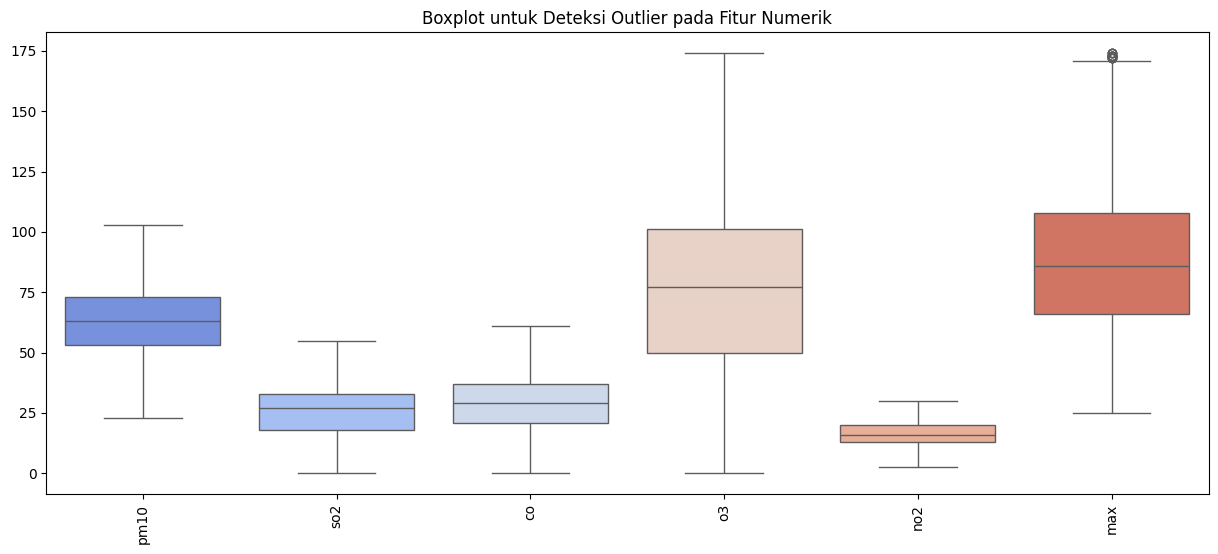

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_cleaned[new_numerical_cols])
plt.xticks(rotation=90)
plt.title("Boxplot untuk Deteksi Outlier pada Fitur Numerik")
plt.show()

In [ ]:
label_encoder = LabelEncoder()

# Loop melalui kolom kategorikal dan lakukan label encoding
for col in ['stasiun','critical','categori']:
    df_cleaned[col] = label_encoder.fit_transform(df_cleaned[col])

In [ ]:
scaler = StandardScaler()
df_scaled = df_cleaned.copy()
columns_to_scale = df_cleaned.columns.difference(['tanggal'])
df_scaled[columns_to_scale] = scaler.fit_transform(df_cleaned[columns_to_scale])

In [67]:
joblib.dump(df_scaled, 'scaler.pkl')

['scaler.pkl']

In [ ]:
df_scaled.to_csv('polutan.csv', index=False)
print("df_scaled berhasil disimpan sebagai polutan.csv")

df_scaled berhasil disimpan sebagai polutan.csv


### Insight dari Data Preprocessing

---

#### 🧹 1. Penanganan Nilai Hilang (Missing Value)

- Interpolasi linier digunakan untuk mengisi nilai hilang pada fitur numerik seperti `pm10`, `pm25`, `so2`, `co`, `o3`, `no2`, dan `max`.
- Nilai modus digunakan untuk mengisi nilai hilang pada kolom kategorikal `critical`.
- Kolom `pm25` dihapus karena memiliki banyak nilai hilang dan korelasi yang tinggi dengan fitur lain, yang berpotensi mempengaruhi akurasi model.

---

#### 🚨 2. Penanganan Outlier

- Metode IQR digunakan beberapa kali untuk mengidentifikasi dan menghapus outlier dari fitur numerik.
- Outlier memberikan dampak signifikan terhadap data. Visualisasi boxplot setelah penerapan IQR menunjukkan perbaikan, namun perlu investigasi lanjutan agar tidak ada data penting yang ikut terhapus.

---

#### 🏷️ 3. Encoding Fitur Kategorikal

- Label encoding diterapkan pada kolom kategorikal: `stasiun`, `critical`, dan `categori`.
- Penting untuk dicatat bahwa metode ini menciptakan hubungan ordinal, yang mungkin tidak cocok untuk semua jenis model.

---

#### 📏 4. Normalisasi Fitur (Feature Scaling)

- StandardScaler digunakan untuk melakukan standarisasi fitur numerik.
- Langkah ini penting untuk model yang sensitif terhadap skala fitur agar fitur dengan nilai besar tidak mendominasi model.

---

#### 💾 5. Penyimpanan Data

- Data hasil preprocessing (`df_scaled`) disimpan dalam file `polutan.csv`.
- Objek scaler disimpan menggunakan `joblib` dalam file `scaler.pkl` untuk digunakan saat inferensi atau prediksi.

---

### 🔍 Pertimbangan Lanjutan

- Pemilihan interpolasi linier dan imputasi modus untuk nilai hilang dapat dievaluasi lebih lanjut.
- Metode deteksi outlier tambahan bisa dipertimbangkan dengan hati-hati untuk meminimalisir kehilangan informasi penting.
- Alternatif encoding seperti one-hot encoding sebaiknya dipertimbangkan sesuai dengan model machine learning yang akan digunakan.
- Dampak penghapusan kolom `pm25` harus dinilai kembali pada tahap pemodelan.

## Model Training

### Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Contoh fitur tambahan
df_scaled['dayofweek'] = df_scaled['tanggal'].dt.dayofweek  # 0=Senin
df_scaled['is_weekend'] = df_scaled['dayofweek'] >= 5

# Fitur input dan target
features = ['pm10', 'so2', 'co', 'o3', 'no2', 'dayofweek', 'is_weekend']
targets = ['pm10', 'so2', 'co', 'o3', 'no2']  # memprediksi semuanya

X = df_scaled[features]
y = df_scaled[targets]  # multivariate output

In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
# Model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
# Prediksi
y_pred = rf.predict(X_test)

In [ ]:
# Hitung per metrik untuk setiap target (polutan)
mae = mean_absolute_error(y_test, y_pred, multioutput='raw_values')
mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred, multioutput='raw_values')

# Nama kolom target
pollutants = ['pm10', 'so2', 'co', 'o3', 'no2']

# Tampilkan semua metrik per polutan
print("Evaluasi Model per Polutan:\n")
for i, polutan in enumerate(pollutants):
    print(f"📍 {polutan.upper()}")
    print(f"   MAE  : {mae[i]:.2f}")
    print(f"   MSE  : {mse[i]:.2f}")
    print(f"   RMSE : {rmse[i]:.2f}")
    print(f"   R²   : {r2[i]:.4f}\n")

Evaluasi Model per Polutan:

📍 PM10
   MAE  : 0.13
   MSE  : 0.03
   RMSE : 0.18
   R²   : 0.9600

📍 SO2
   MAE  : 0.23
   MSE  : 0.12
   RMSE : 0.34
   R²   : 0.8512

📍 CO
   MAE  : 0.55
   MSE  : 0.58
   RMSE : 0.76
   R²   : 0.1028

📍 O3
   MAE  : 0.65
   MSE  : 0.67
   RMSE : 0.82
   R²   : 0.0810

📍 NO2
   MAE  : 0.28
   MSE  : 0.24
   RMSE : 0.49
   R²   : 0.8276



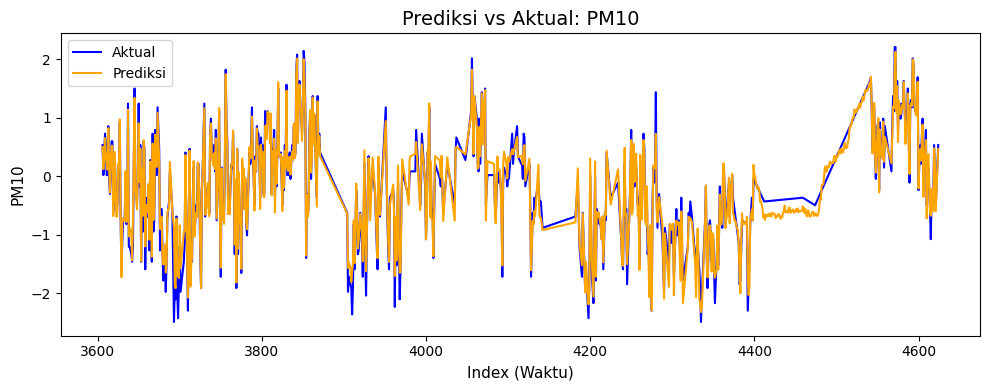

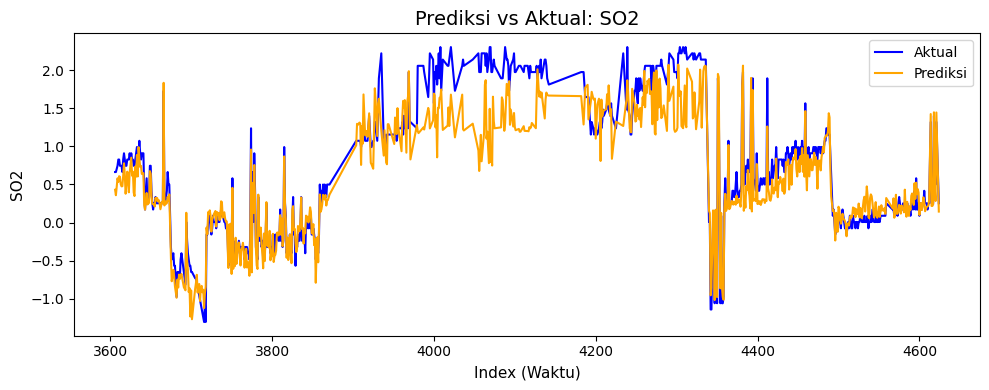

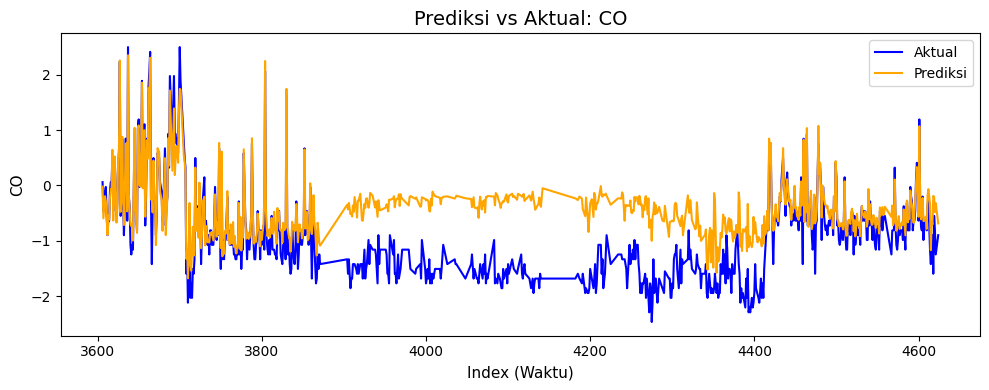

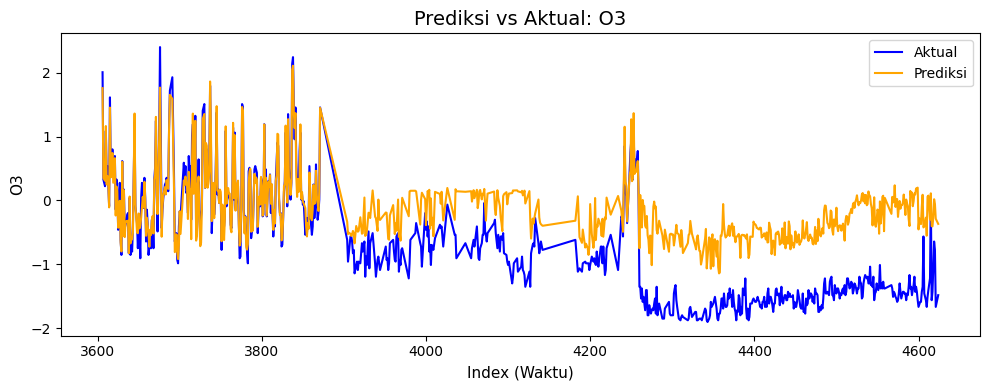

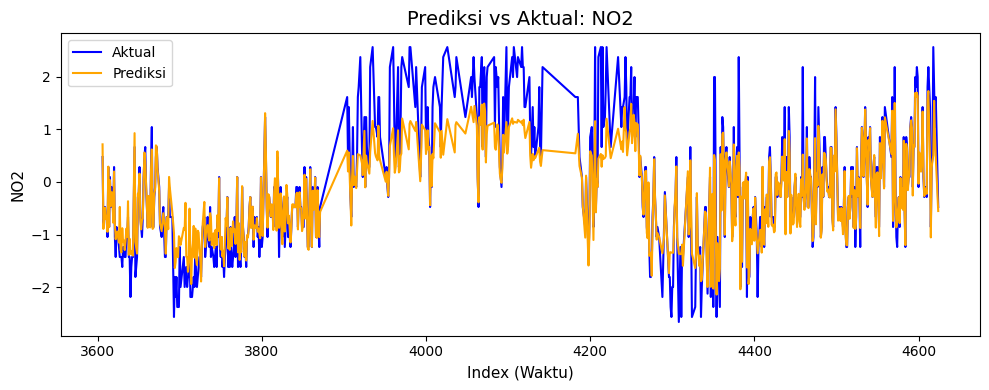

In [ ]:
# Konversi prediksi ke DataFrame agar lebih mudah dipakai
y_pred_df = pd.DataFrame(y_pred, columns=targets, index=y_test.index)

# Loop visualisasi per-polutan
for col in targets:
    plt.figure(figsize=(10, 4))
    plt.plot(y_test.index, y_test[col], label='Aktual', color='blue')
    plt.plot(y_pred_df.index, y_pred_df[col], label='Prediksi', color='orange')
    plt.title(f'Prediksi vs Aktual: {col.upper()}', fontsize=14)
    plt.xlabel('Index (Waktu)', fontsize=11)
    plt.ylabel(f'{col.upper()}', fontsize=11)
    plt.legend()
    plt.tight_layout()
    plt.show()

### Support Vector Regression

In [91]:
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor

svr_base = SVR(kernel='rbf')
svr = MultiOutputRegressor(svr_base)
svr.fit(X_train, y_train)

MultiOutputRegressor(estimator=SVR())

In [92]:
# Prediksi
y_pred_svr = svr.predict(X_test)

In [93]:
# Evaluasi model (sama seperti RandomForest)
mae_svr = mean_absolute_error(y_test, y_pred_svr, multioutput='raw_values')
mse_svr = mean_squared_error(y_test, y_pred_svr, multioutput='raw_values')
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr, multioutput='raw_values')

print("Evaluasi Model Regresi Linear per Polutan:\n")
for i, polutan in enumerate(pollutants):
    print(f"📍 {polutan.upper()}")
    print(f"   MAE  : {mae_svr[i]:.2f}")
    print(f"   MSE  : {mse_svr[i]:.2f}")
    print(f"   RMSE : {rmse_svr[i]:.2f}")
    print(f"   R²   : {r2_svr[i]:.4f}\n")

Evaluasi Model Regresi Linear per Polutan:

📍 PM10
   MAE  : 0.08
   MSE  : 0.01
   RMSE : 0.12
   R²   : 0.9823

📍 SO2
   MAE  : 0.19
   MSE  : 0.08
   RMSE : 0.29
   R²   : 0.8922

📍 CO
   MAE  : 0.24
   MSE  : 0.12
   RMSE : 0.34
   R²   : 0.8177

📍 O3
   MAE  : 0.21
   MSE  : 0.09
   RMSE : 0.29
   R²   : 0.8829

📍 NO2
   MAE  : 0.14
   MSE  : 0.06
   RMSE : 0.25
   R²   : 0.9560



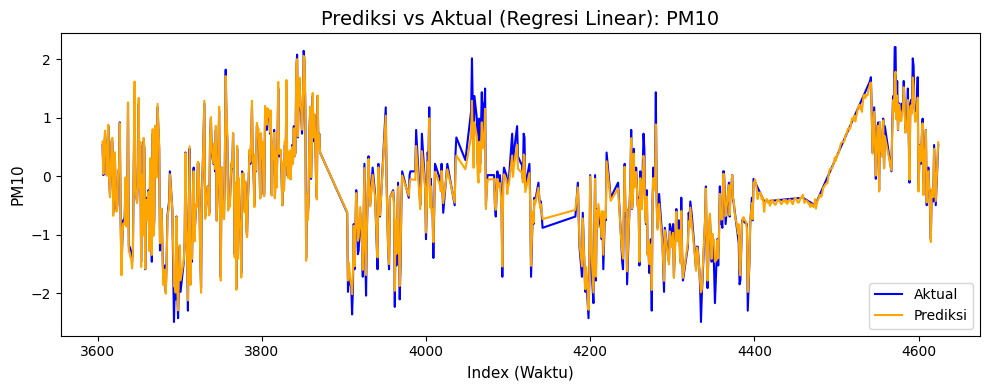

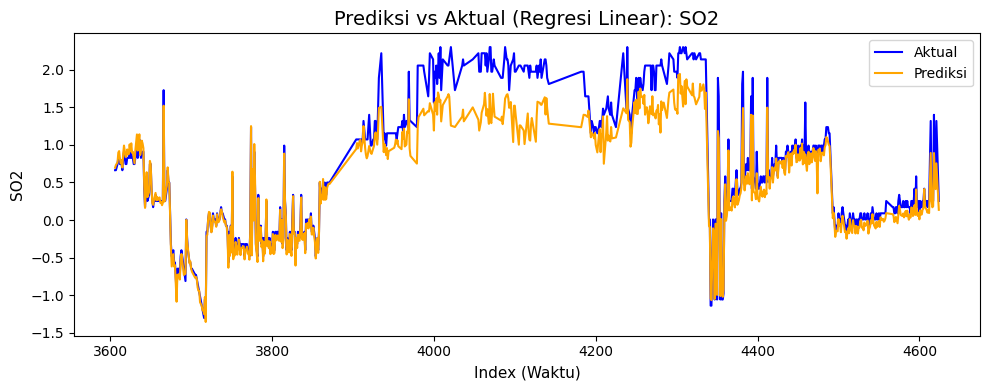

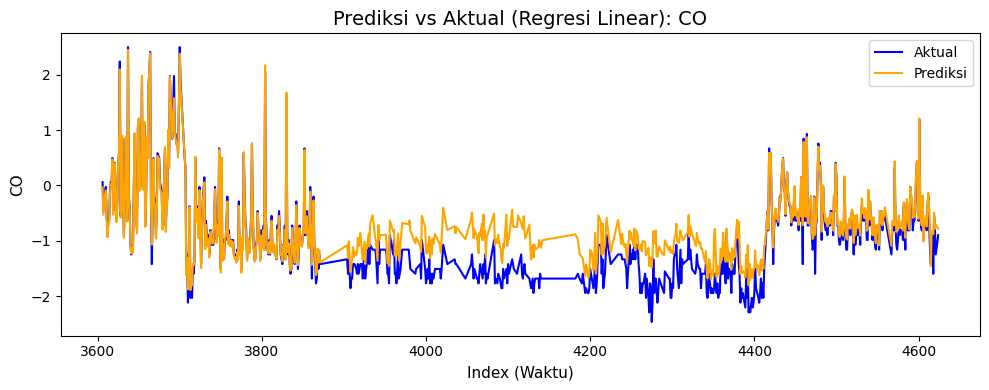

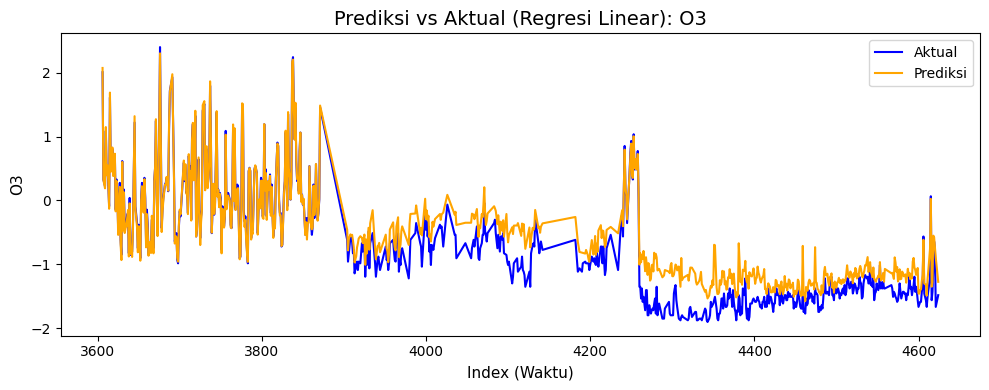

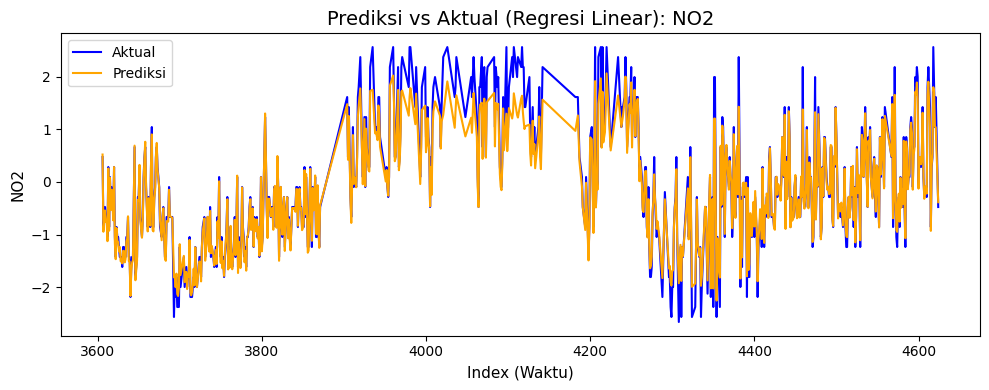

In [94]:
# Visualisasi hasil prediksi (sama seperti RandomForest, tapi ubah variabel)
y_pred_svr_df = pd.DataFrame(y_pred_svr, columns=targets, index=y_test.index)

for col in targets:
    plt.figure(figsize=(10, 4))
    plt.plot(y_test.index, y_test[col], label='Aktual', color='blue')
    plt.plot(y_pred_svr_df.index, y_pred_svr_df[col], label='Prediksi', color='orange')
    plt.title(f'Prediksi vs Aktual (Regresi Linear): {col.upper()}', fontsize=14)
    plt.xlabel('Index (Waktu)', fontsize=11)
    plt.ylabel(f'{col.upper()}', fontsize=11)
    plt.legend()
    plt.tight_layout()
    plt.show()

### Perbandingan

📊 Random Forest Metrics:
  Metric      pm10       so2        co        o3       no2
0    MAE  0.134607  0.234280  0.553696  0.648512  0.283308
1    MSE  0.032992  0.116860  0.579019  0.671547  0.235880
2   RMSE  0.181638  0.341847  0.760933  0.819480  0.485674
3     R2  0.960040  0.851241  0.102822  0.081037  0.827617

📊 SVR Metrics:
  Metric      pm10       so2        co        o3       no2
0    MAE  0.078469  0.190000  0.236514  0.214601  0.139851
1    MSE  0.014575  0.084701  0.117647  0.085608  0.060249
2   RMSE  0.120729  0.291034  0.342997  0.292588  0.245457
3     R2  0.982346  0.892178  0.817708  0.882852  0.955970

✅ Overall, the SVR model performs better based on the R² scores across all pollutants.


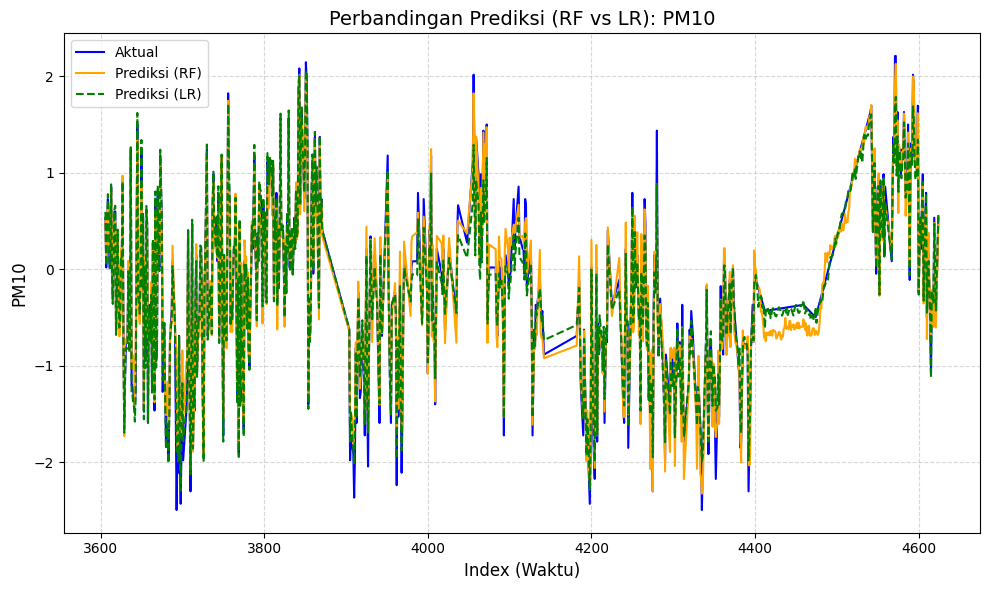

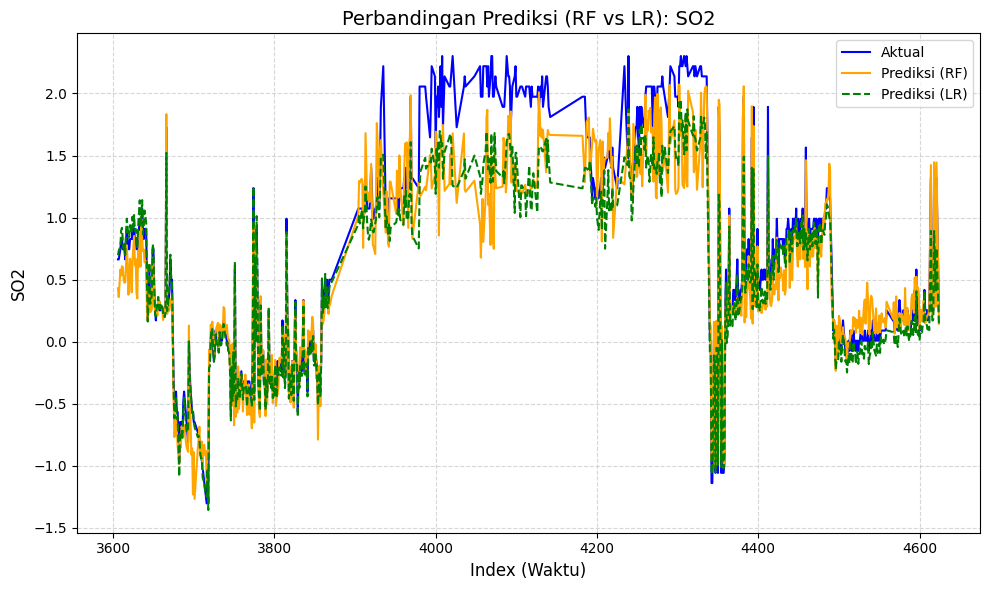

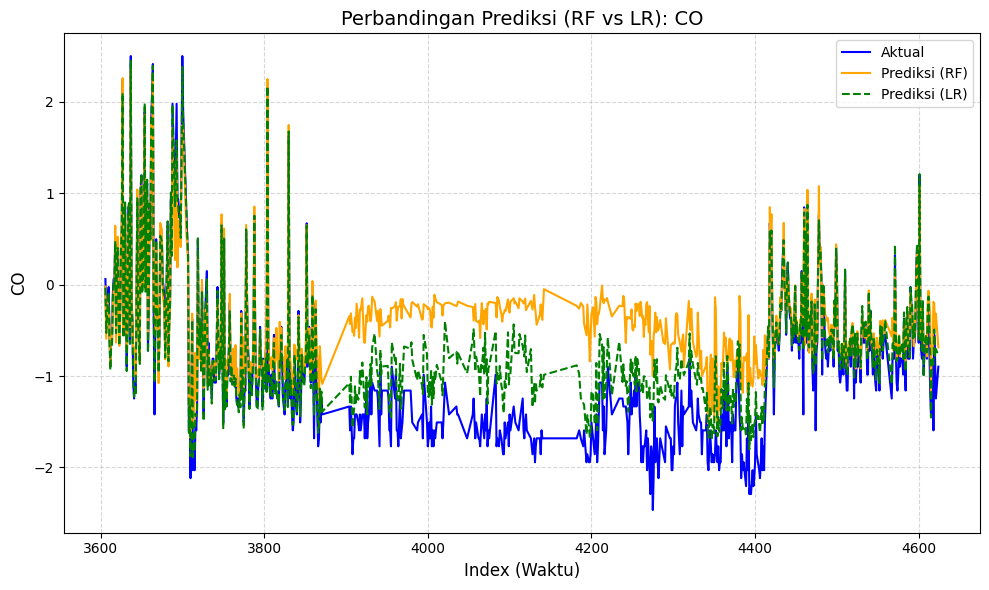

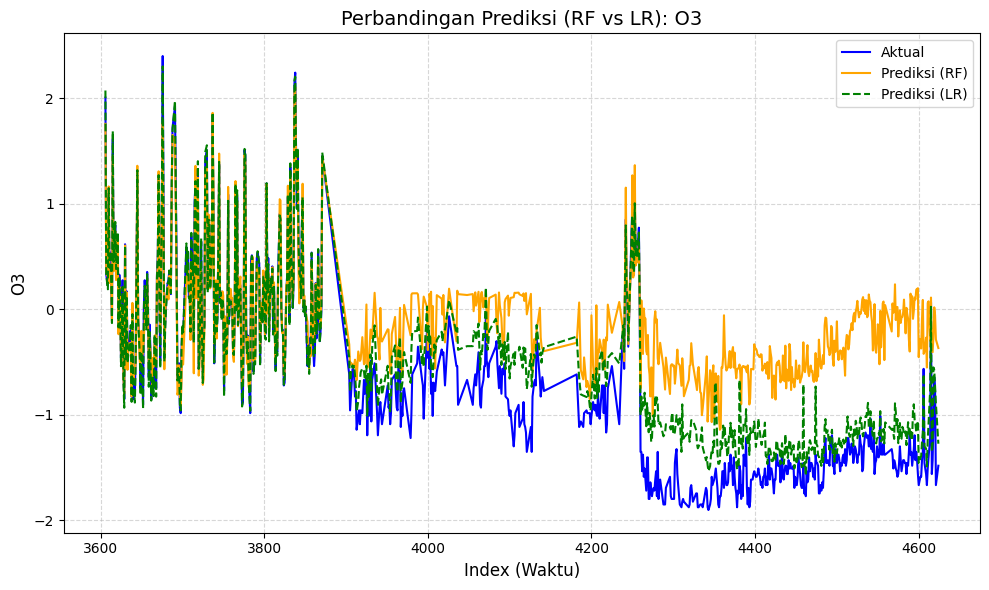

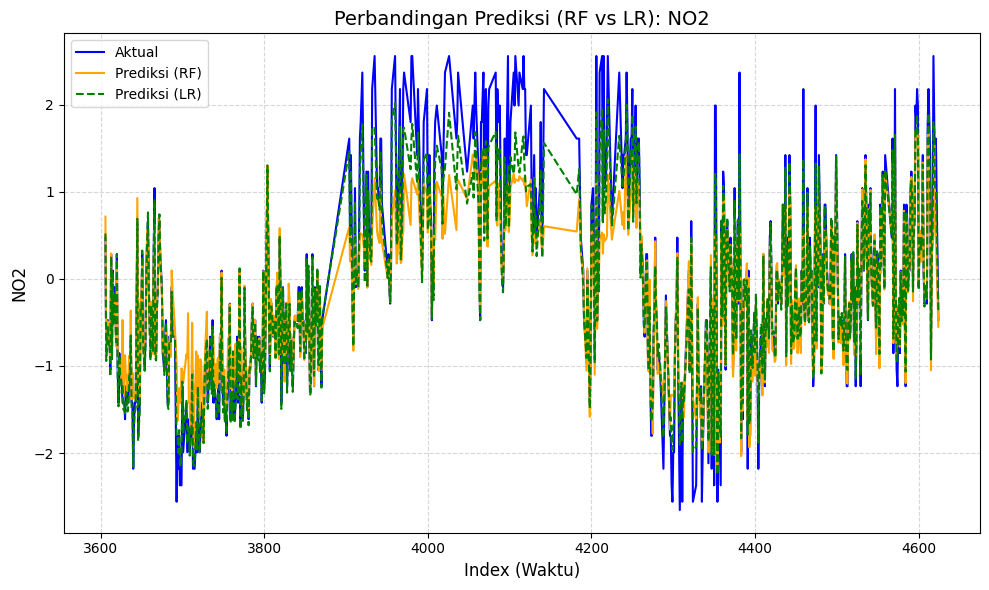

In [95]:
# --- Buat DataFrame untuk Random Forest ---
rf_metrics = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],
    'pm10': [mae[0], mse[0], rmse[0], r2[0]],
    'so2': [mae[1], mse[1], rmse[1], r2[1]],
    'co': [mae[2], mse[2], rmse[2], r2[2]],
    'o3': [mae[3], mse[3], rmse[3], r2[3]],
    'no2': [mae[4], mse[4], rmse[4], r2[4]]
})

# --- Buat DataFrame untuk Linear Regression ---
svr_metrics = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],
    'pm10': [mae_svr[0], mse_svr[0], rmse_svr[0], r2_svr[0]],
    'so2': [mae_svr[1], mse_svr[1], rmse_svr[1], r2_svr[1]],
    'co': [mae_svr[2], mse_svr[2], rmse_svr[2], r2_svr[2]],
    'o3': [mae_svr[3], mse_svr[3], rmse_svr[3], r2_svr[3]],
    'no2': [mae_svr[4], mse_svr[4], rmse_svr[4], r2_svr[4]]
})

# --- Tampilkan hasil ---
print("📊 Random Forest Metrics:")
print(rf_metrics)
print("\n📊 SVR Metrics:")
print(svr_metrics)

# --- Evaluasi model terbaik berdasarkan R2 (semakin tinggi semakin baik) ---
rf_r2 = rf_metrics.set_index('Metric').loc['R2']
svr_r2 = svr_metrics.set_index('Metric').loc['R2']
better_model = "Random Forest" if (rf_r2 > svr_r2).all() else "SVR"
print(f"\n✅ Overall, the {better_model} model performs better based on the R² scores across all pollutants.")

# --- Visualisasi hasil prediksi ---
for col in ['pm10', 'so2', 'co', 'o3', 'no2']:
    plt.figure(figsize=(10, 6))

    plt.plot(y_test.index, y_test[col], label='Aktual', color='blue')
    plt.plot(y_pred_df.index, y_pred_df[col], label='Prediksi (RF)', color='orange')
    plt.plot(y_pred_svr_df.index, y_pred_svr_df[col], label='Prediksi (LR)', color='green', linestyle='--')

    plt.title(f'Perbandingan Prediksi (RF vs LR): {col.upper()}', fontsize=14)
    plt.xlabel('Index (Waktu)', fontsize=12)
    plt.ylabel(col.upper(), fontsize=12)
    plt.legend(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

In [ ]:
joblib.dump(rf, 'rf_model.pkl')

['rf_model.pkl']

In [96]:
joblib.dump(svr, 'svr_model.pkl')

['svr_model.pkl']

### Insight dari Pelatihan Model (Model Training)

#### Perbandingan Kinerja Model
Kode melakukan evaluasi terhadap dua model regresi, yaitu **Random Forest (RF)** dan **Support Vector Regression (SVR)** untuk memprediksi level polutan udara (pm10, so2, co, o3, no2). Beberapa metrik evaluasi utama yang digunakan adalah **MAE, MSE, RMSE, dan R²** untuk masing-masing polutan dan model. Perbandingan akhir ditentukan berdasarkan skor R² untuk memilih model terbaik secara keseluruhan.

---

#### Kinerja Model Random Forest
- Memberikan metrik performa secara rinci (MAE, MSE, RMSE, R²) untuk setiap polutan.
- Menyediakan visualisasi antara nilai aktual dan nilai prediksi untuk setiap polutan, sehingga dapat dinilai akurasi model secara visual seiring waktu.

#### Kinerja Model Support Vector Regression
- Menyediakan metrik performa yang sama seperti Random Forest untuk setiap polutan.
- Menyediakan visualisasi nilai aktual vs prediksi, memungkinkan perbandingan visual langsung dengan hasil dari model RF.

---

#### Seleksi Model Terbaik
- Melakukan perbandingan skor R² untuk menentukan model terbaik secara keseluruhan.
- Menampilkan pernyataan yang jelas tentang model mana yang lebih unggul (Random Forest atau SVR) berdasarkan hasil evaluasi.
- Menyediakan visualisasi yang membandingkan nilai aktual dengan prediksi dari kedua model untuk tiap polutan.

---

#### Penyimpanan Model
- Menyimpan kedua model yang telah dilatih (RandomForestRegressor dan MultiOutputRegressor untuk SVR) menggunakan **joblib**, agar bisa digunakan kembali untuk prediksi tanpa perlu pelatihan ulang.

---

#### Pertimbangan Lanjutan
- Analisis saat ini hanya fokus pada perbandingan RF dan SVR. Model regresi lain seperti **Linear Regression** atau **Gradient Boosting** dapat dieksplorasi untuk hasil yang lebih baik.
- **Tuning hyperparameter** dari kedua model bisa meningkatkan akurasi prediksi secara signifikan.
- **Rekayasa fitur (feature engineering)** berpotensi mengungkap variabel baru yang relevan, seperti data meteorologi atau informasi geografis.
- Evaluasi kinerja model dengan metrik tambahan atau **teknik cross-validation** akan memberikan hasil yang lebih kuat dan terpercaya.
- Menelaah **residual (selisih prediksi dengan aktual)** dapat membantu mengidentifikasi pola atau bias sistematis dalam model.



## Prediksi

In [97]:
svr_model = joblib.load('svr_model.pkl')

In [63]:
# Buat ulang fitur tambahan di df
df['dayofweek'] = df['tanggal'].dt.dayofweek
df['is_weekend'] = df['dayofweek'] >= 5

In [65]:
df.tail()

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori,dayofweek,is_weekend
4621,2023-11-26,DKI1 (Bunderan HI),55.0,43.0,15.0,15.0,25.0,75.0,PM25,SEDANG,6,True
4622,2023-11-27,DKI3 (Jagakarsa),54.0,56.0,13.0,27.0,16.0,77.0,PM25,SEDANG,0,False
4623,2023-11-28,DKI1 (Bunderan HI),62.0,45.0,15.0,29.0,34.0,96.0,PM25,SEDANG,1,False
4624,2023-11-29,DKI4 (Lubang Buaya),71.0,30.0,19.0,22.0,14.0,105.0,PM25,TIDAK SEHAT,2,False
4625,2023-11-30,DKI1 (Bunderan HI),38.0,43.0,12.0,34.0,34.0,67.0,PM25,SEDANG,3,False


In [66]:
df[features].iloc[[-1]]

,pm10,so2,co,o3,no2,dayofweek,is_weekend
4625,38.0,43.0,12.0,34.0,34.0,3,False


In [98]:
from datetime import timedelta
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

features = ['pm10', 'so2', 'co', 'o3', 'no2', 'dayofweek', 'is_weekend']
targets = ['pm10', 'so2', 'co', 'o3', 'no2']

# Skala data
scaler = StandardScaler()
scaler.fit(df[features])

# Ambil input awal (baris terakhir)
initial_input = df[features].iloc[[-1]].copy()
last_date = df['tanggal'].max()

# Fungsi prediksi recursive
def recursive_forecast(n_days, start_input, start_date):
    current_input = start_input.copy()
    hasil_prediksi = []

    for _ in range(n_days):
        next_date = start_date + timedelta(days=1)
        current_input['dayofweek'] = next_date.dayofweek
        current_input['is_weekend'] = int(next_date.dayofweek >= 5)

        scaled_input = pd.DataFrame(scaler.transform(current_input[features]), columns=features)
        pred_scaled = svr_model.predict(scaled_input)[0]

        dummy_input = np.zeros((1, len(features)))
        dummy_input[0, :len(targets)] = pred_scaled
        unscaled_pred = scaler.inverse_transform(dummy_input)[0, :len(targets)]

        hasil_prediksi.append([next_date] + list(unscaled_pred))

        for j, target in enumerate(targets):
            current_input.iloc[0, j] = unscaled_pred[j]
        start_date = next_date

    return pd.DataFrame(hasil_prediksi, columns=['tanggal'] + targets)

# Prediksi 1 hari ke depan
pred_besok = recursive_forecast(1, initial_input.copy(), last_date)
print("📌 Prediksi Kualitas Udara Besok:")
print(pred_besok)

# Prediksi 30 hari (1 bulan) dari hari terakhir dataset
pred_bulan = recursive_forecast(30, initial_input.copy(), last_date)
print("\n📆 Prediksi Kualitas Udara 1 Bulan ke Depan (tanggal terakhir):")
print(pred_bulan.tail(1))  # hanya tanggal ke-30

# Prediksi 365 hari dari hasil terakhir bulan
last_input_bulan = pred_bulan[targets].iloc[[-1]].copy()
# Tambahkan fitur waktu
last_date_bulan = pred_bulan['tanggal'].iloc[-1]
last_input_bulan['dayofweek'] = last_date_bulan.dayofweek
last_input_bulan['is_weekend'] = int(last_date_bulan.dayofweek >= 5)

# Prediksi 365 hari
pred_tahun = recursive_forecast(365, last_input_bulan.copy(), last_date_bulan)
print("\n📆 Prediksi Kualitas Udara 1 Tahun ke Depan (tanggal terakhir):")
print(pred_tahun.tail(1))  # hanya tanggal ke-365

📌 Prediksi Kualitas Udara Besok:
     tanggal       pm10        so2         co         o3        no2
0 2023-12-01  43.461488  39.471567  18.654762  55.477519  30.096188

📆 Prediksi Kualitas Udara 1 Bulan ke Depan (tanggal terakhir):
      tanggal       pm10        so2         co         o3        no2
29 2023-12-30  43.844371  29.996862  30.812412  75.931515  23.726338

📆 Prediksi Kualitas Udara 1 Tahun ke Depan (tanggal terakhir):
       tanggal      pm10        so2         co         o3        no2
364 2024-12-29  40.83014  15.134144  40.601936  61.705665  15.230278


In [99]:
def plot_forecast(df_pred, title, figsize=(12, 6)):
    plt.figure(figsize=figsize)
    for col in targets:
        plt.plot(df_pred['tanggal'], df_pred[col], label=col.upper())

    plt.title(title, fontsize=16)
    plt.xlabel('Tanggal', fontsize=12)
    plt.ylabel('Konsentrasi Polutan', fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

<ipython-input-99-f0902093881a>:12: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


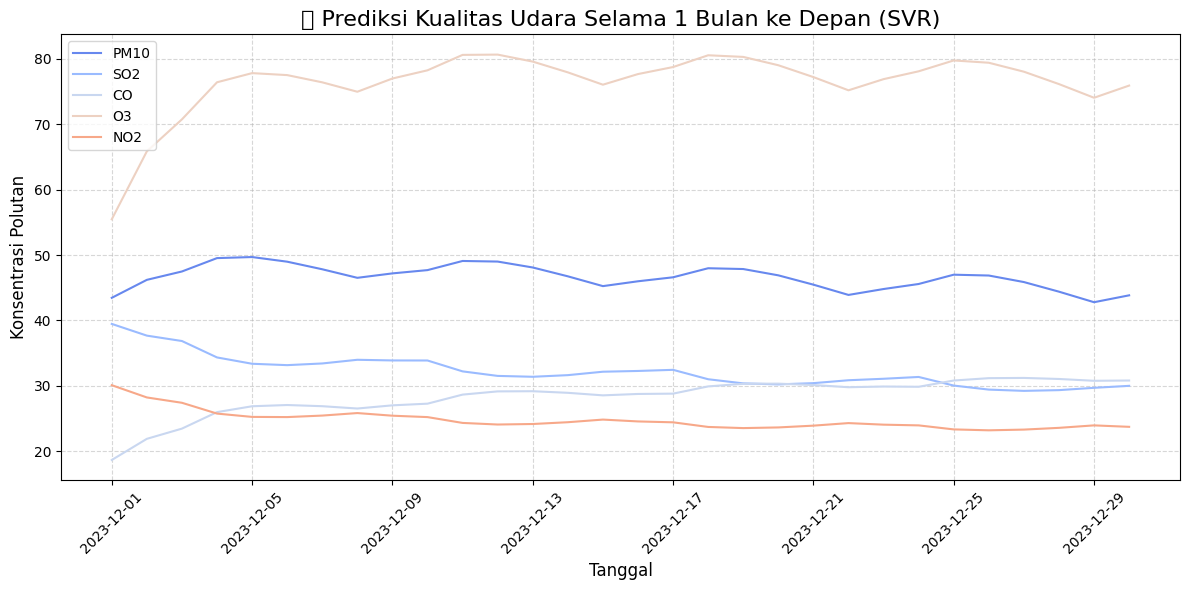

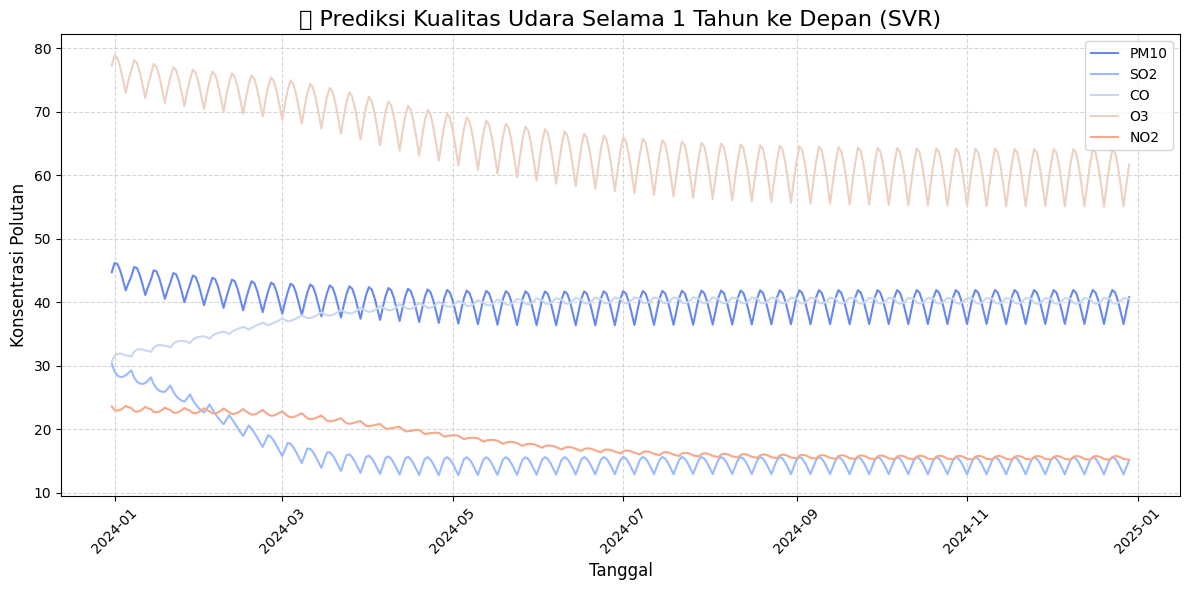

In [100]:
# Visualisasi prediksi 1 bulan ke depan
plot_forecast(pred_bulan, "📈 Prediksi Kualitas Udara Selama 1 Bulan ke Depan (SVR)")

# Visualisasi prediksi 1 tahun ke depan
plot_forecast(pred_tahun, "📈 Prediksi Kualitas Udara Selama 1 Tahun ke Depan (SVR)")
